In [5]:
spark.conf.set("spark.sql.repl.eagerEval.enabled",True)

In [6]:
import os
import subprocess
import pandas as pd
from pyspark.sql import functions as F
from pyspark.sql.functions import *
from pyspark.sql.types import *

In [7]:
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', None)
pd.reset_option('display.max_rows')
from itertools import compress 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
warnings.simplefilter('ignore')

In [8]:
directory = 'gs://msca-bdp-students-bucket/shared_data/linhcle/final_project/clean2/'
# file = '*.json'
# path = directory + file
path = directory

In [9]:
cmd = 'hadoop fs -du -s -h ' + directory

p = subprocess.Popen(cmd, shell=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT, universal_newlines=True)
for line in p.stdout.readlines():
    print (line)
    
retval = p.wait()

6.1 G  6.1 G  gs://msca-bdp-students-bucket/shared_data/linhcle/final_project/clean2



In [7]:
import pyspark 
#sc = spark.sparkContext
print('Original spark.driver.maxResultSize: ' + sc._conf.get('spark.driver.maxResultSize'))
conf = pyspark.SparkConf().setAll([('spark.driver.maxResultSize', '32g')])
# here you stop the old spark context with old conf
sc.stop()



Original spark.driver.maxResultSize: 1920m


In [8]:
sc = pyspark.SparkContext(conf=conf)
print('New spark.driver.maxResultSize: ' + sc._conf.get('spark.driver.maxResultSize'))
 

22/12/07 20:43:48 INFO org.apache.spark.SparkEnv: Registering MapOutputTracker
22/12/07 20:43:48 INFO org.apache.spark.SparkEnv: Registering BlockManagerMaster
22/12/07 20:43:48 INFO org.apache.spark.SparkEnv: Registering BlockManagerMasterHeartbeat
22/12/07 20:43:48 INFO org.apache.spark.SparkEnv: Registering OutputCommitCoordinator


New spark.driver.maxResultSize: 32g


In [9]:
spark = SparkSession.builder.getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled",True) 

In [10]:
%%time

tweets_df_clean = spark.read.parquet(path)

CPU times: user 6.97 ms, sys: 1.34 ms, total: 8.32 ms
Wall time: 7.42 s


In [11]:
user_type = tweets_df_clean.select(col('user_screen_name').alias('retweeted_status_user_screen_name'),col('user_type').alias('retweeted_status_user_type')).drop_duplicates()

In [22]:
user_type

22/12/07 19:09:08 WARN org.apache.spark.scheduler.cluster.YarnSchedulerBackend$YarnSchedulerEndpoint: Requesting driver to remove executor 9 for reason Container marked as failed: container_1670429010405_0002_01_000009 on host: hub-msca-bdp-dphub-students-backup-linhcle-sw-zcsz.c.msca-bdp-students.internal. Exit status: -100. Diagnostics: Container released on a *lost* node.
22/12/07 19:09:08 WARN org.apache.spark.scheduler.cluster.YarnSchedulerBackend$YarnSchedulerEndpoint: Requesting driver to remove executor 7 for reason Container marked as failed: container_1670429010405_0002_01_000007 on host: hub-msca-bdp-dphub-students-backup-linhcle-sw-zcsz.c.msca-bdp-students.internal. Exit status: -100. Diagnostics: Container released on a *lost* node.
22/12/07 19:09:08 ERROR org.apache.spark.scheduler.cluster.YarnScheduler: Lost executor 9 on hub-msca-bdp-dphub-students-backup-linhcle-sw-zcsz.c.msca-bdp-students.internal: Container marked as failed: container_1670429010405_0002_01_000009 on 

user_screen_name,retweeted_status_user_type
Mf1Dale,Other
Thos_M210,Other
O4Prezido,Other
modmothernature,Other
CJSzafir,Other
CaptainZoey,Other
Laits10,Other
syitoosolid_,Other
8makes1bong,Other
Ryanbaustian,Other


In [26]:
tweets_df_clean

created_at,id,text,favorite_count,retweet_count,reply_count,retweeted_status_retweet_count,retweeted_status_user_screen_name,tweet_longitude,tweet_latitude,user_created_at,user_id,user_description,user_favourites_count,user_followers_count,user_friends_count,user_location,user_screen_name,user_verified,place_country,place_name,place_full_name,user_type,tweet_type
Mon Apr 25 19:37:...,1518675467464810502,RT @joeyhiles1: W...,0,0,0,6378,joeyhiles1,null,null,Mon Nov 28 21:39:...,423734352,The world ends wi...,11438,637,637,Shadow Realm,KidWicked__,false,null,null,null,Other,retweet
Mon Apr 25 19:37:...,1518675468232413186,RT @RSCPerkin: 50...,0,0,0,9,RSCPerkin,null,null,Fri Mar 02 13:22:...,969563472689270784,Synthetic organic...,1208,493,508,"Edinburgh, Scotland",metalationman,false,null,null,null,Other,retweet
Mon Apr 25 19:37:...,1518675470316883970,RT @jsmainnn: You...,0,0,0,3589,jsmainnn,null,null,Sun Jul 11 22:21:...,1414349156131524611,bi and horny dm f...,663,11,128,null,sqxishbish_,false,null,null,null,Other,retweet
Mon Apr 25 19:37:...,1518675471302496256,RT @InHomeTutor80...,0,0,0,1,InHomeTutor808,null,null,Fri Jun 11 04:28:...,1403207395145256961,FREE post your ad...,17,78,178,null,AddYourAdForum,false,null,null,null,Other,retweet
Mon Apr 25 19:37:...,1518675473491841024,Universities and ...,0,0,0,null,null,null,null,Thu May 17 08:41:...,6100082,@Wonkhe SUs. Trus...,22275,10587,3884,Watford,jim_dickinson,true,null,null,null,Other,original
Mon Apr 25 19:37:...,1518675473168953344,I'll be at the Un...,0,0,0,null,null,null,null,Thu Jan 21 04:17:...,1352107954195972098,‘25 WR @AABonNBC ...,4057,542,280,"Monrovia, CA",wesssjayy,false,null,null,null,Other,original
Mon Apr 25 19:37:...,1518675475010367489,RT @Dagger_Knox: ...,0,0,0,68,Dagger_Knox,null,null,Tue Feb 11 00:11:...,1227022154249756673,ASU 22💛💙✨22✨ Sh...,197248,317,695,"Atlanta, GA",IzzyGabbana,false,null,null,null,Other,retweet
Mon Apr 25 19:37:...,1518675475824091139,The Office for St...,0,0,0,null,null,null,null,Thu May 17 08:41:...,6100082,@Wonkhe SUs. Trus...,22275,10587,3884,Watford,jim_dickinson,true,null,null,null,Other,original
Mon Apr 25 19:37:...,1518675476381790208,RT @Dutch_65: Aft...,0,0,0,1,Dutch_65,null,null,Fri Jan 08 23:10:...,4730565637,Orange Lutheran O...,15521,2377,1866,"Orange County, CA",ChrisWardOL,false,null,null,null,University,retweet
Mon Apr 25 19:37:...,1518675479984807937,In high school we...,0,0,0,null,null,null,null,Wed Feb 16 20:06:...,253218023,Special girl. Rea...,10231,2362,1288,Sugar Hill,neishneishh,false,null,null,null,Other,original


In [13]:
tweets_df_complete = tweets_df_clean.join(user_type,tweets_df_clean['retweeted_status_user_screen_name'] == user_type['retweeted_status_user_screen_name'],how='left').drop(user_type['retweeted_status_user_screen_name'])

In [32]:
tweets_df_complete.limit(5)

22/12/07 19:22:27 WARN org.apache.spark.scheduler.cluster.YarnSchedulerBackend$YarnSchedulerEndpoint: Requesting driver to remove executor 13 for reason Container marked as failed: container_1670429010405_0002_01_000013 on host: hub-msca-bdp-dphub-students-backup-linhcle-sw-s7hk.c.msca-bdp-students.internal. Exit status: -100. Diagnostics: Container released on a *lost* node.
22/12/07 19:22:27 WARN org.apache.spark.scheduler.cluster.YarnSchedulerBackend$YarnSchedulerEndpoint: Requesting driver to remove executor 12 for reason Container marked as failed: container_1670429010405_0002_01_000012 on host: hub-msca-bdp-dphub-students-backup-linhcle-sw-s7hk.c.msca-bdp-students.internal. Exit status: -100. Diagnostics: Container released on a *lost* node.
22/12/07 19:22:27 ERROR org.apache.spark.scheduler.cluster.YarnScheduler: Lost executor 13 on hub-msca-bdp-dphub-students-backup-linhcle-sw-s7hk.c.msca-bdp-students.internal: Container marked as failed: container_1670429010405_0002_01_000013 

created_at,id,text,favorite_count,retweet_count,reply_count,retweeted_status_retweet_count,retweeted_status_user_screen_name,tweet_longitude,tweet_latitude,user_created_at,user_id,user_description,user_favourites_count,user_followers_count,user_friends_count,user_location,user_screen_name,user_verified,place_country,place_name,place_full_name,user_type,tweet_type,retweeted_status_user_type
Tue Nov 01 16:53:...,1587487915801825281,RT @0728hannah: T...,0,0,0,1,0728hannah,null,null,Tue Aug 30 02:16:...,364629900,Communications Di...,8801,1681,1694,"Baton Rouge, LA",Lauren_Leist,false,null,null,null,Other,retweet,null
Wed Apr 20 15:03:...,1516794787336175619,RT @07HDSB: @Alre...,0,0,0,1,07HDSB,null,null,Sun Sep 06 18:19:...,1302672636217090050,They speak of my ...,56813,333,591,null,vilescott,false,null,null,null,Other,retweet,Other
Sun Aug 14 19:21:...,1558896551925350401,RT @0RBITLUVS: pa...,0,0,0,2,0RBITLUVS,null,null,Thu Aug 15 02:15:...,1161823762939035648,⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀FAN ...,276915,241,63,null,jacksfolklore,false,null,null,null,Other,retweet,Other
Tue Nov 01 23:59:...,1587595326411743233,RT @0RBITLUVS: .｡...,0,0,0,2,0RBITLUVS,null,null,Thu Jan 15 22:45:...,19043242,We were all headi...,60005,1494,4994,Philadelphia,olderbrother21,false,null,null,null,Other,retweet,Other
Tue Nov 01 12:36:...,1587423217278660609,RT @0RBITLUVS: .｡...,0,0,0,1,0RBITLUVS,null,null,Fri Sep 02 12:52:...,1565683997753364480,with high honors ...,459,1538,199,they them grade 10,kaizelstudy,false,null,null,null,Other,retweet,Other


In [14]:
tweets_df_complete = tweets_df_complete.dropDuplicates(['user_screen_name','id','text','created_at'])

In [87]:
#Shape of dataset
print((tweets_df_complete.count()),len(tweets_df_complete.columns))

30330267 25


### I. Author Identification 

##### By message volume

In [10]:
from pyspark.sql.functions import col,when,count
volumn_og = tweets_df_complete.groupBy(['user_screen_name','user_type','tweet_type']).agg(
    count('id')).orderBy('count(id)',ascending=False)


In [11]:
volumn_og = volumn_og.limit(15).toPandas()

In [12]:
volumn_og

,user_screen_name,user_type,tweet_type,count(id)
0,sport9920,Other,original,19726
1,ana92479235,Other,original,19703
2,AndrianyRahmah,News Outlet,original,11597
3,DennisStemmle,University,original,9236
4,EssayPaperUK,Other,original,8788
5,jaeyunowins,School,original,8413
6,hilmsit,School,original,8352
7,AgiwaraS,School,original,7567
8,adeliasari033,School,original,7322
9,studyinnaija,University,original,6607


##### By retweet volume

In [91]:
volumn_re = tweets_df_complete[tweets_df_complete.retweeted_status_user_screen_name != "PEScorpiio"].groupBy(['retweeted_status_user_screen_name','retweeted_status_user_type']).agg(sum('retweeted_status_retweet_count')).orderBy('sum(retweeted_status_retweet_count)',ascending=False)
volumn_re= volumn_re.limit(15).toPandas()
volumn_re

,retweeted_status_user_screen_name,retweeted_status_user_type,sum(retweeted_status_retweet_count)
0,NicholasFerroni,Other,1761595304
1,ChrChristensen,Other,1033082218
2,brndxq,Other,776140161
3,mattxiv,Other,709310727
4,Mr_JCE,News Outlet,704514755
5,polevaultpower,Other,652023001
6,CathyMarksKrpan,Other,584476648
7,Ernie_Zuniga,News Outlet,577082950
8,KianSharifi,News Outlet,533081853
9,MichaelWarbur17,Other,483336110


##### By user type: original tweet

In [17]:
volumn_og_by_type = tweets_df_complete.groupBy(['user_type','tweet_type']).agg(
    count('id')).orderBy('count(id)',ascending=False)
volumn_og_by_type = volumn_og_by_type.limit(15).toPandas()
volumn_og_by_type

,user_type,tweet_type,count(id)
0,Other,retweet,19069956
1,Other,original,8575094
2,School,original,654006
3,University,original,597469
4,University,retweet,595149
5,News Outlet,original,555188
6,School,retweet,477563
7,News Outlet,retweet,273485
8,Health Organization,retweet,229474
9,Health Organization,original,111123


##### By user type: retweet

In [16]:
volumn_re_by_type = tweets_df_complete.groupBy(['retweeted_status_user_type']).agg(sum('retweeted_status_retweet_count')).orderBy('sum(retweeted_status_retweet_count)',ascending=False)
volumn_re_by_type= volumn_re_by_type.limit(15).toPandas()
volumn_re_by_type

,retweeted_status_user_type,sum(retweeted_status_retweet_count)
0,Other,34279770113
1,News Outlet,3990329002
2,None,3949198117
3,University,984058698
4,Health Organization,277032679
5,Social Media Influencer,255277740
6,School,234021771
7,Nonprofit Organization,30747763
8,Government Entities,8917781


##### Visualize authors

In [17]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

<AxesSubplot:title={'center':'Volumn of Original Tweet by Twitterers'}, xlabel='user_screen_name'>

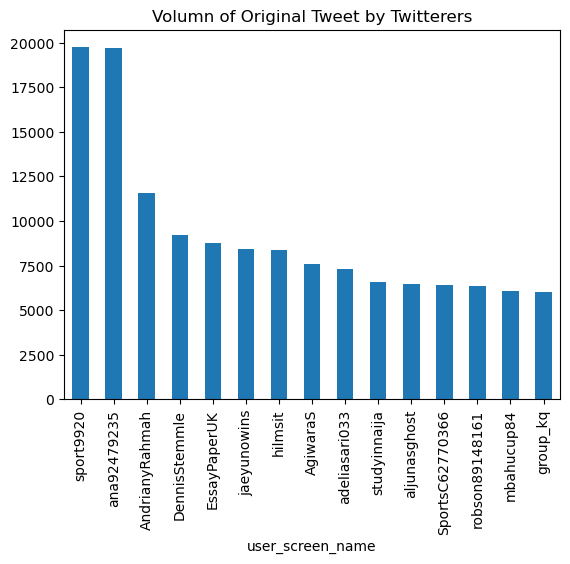

In [26]:

volumn_og.plot(kind='bar',x='user_screen_name', y='count(id)', legend=None, title="Volumn of Original Tweet by Twitterers")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

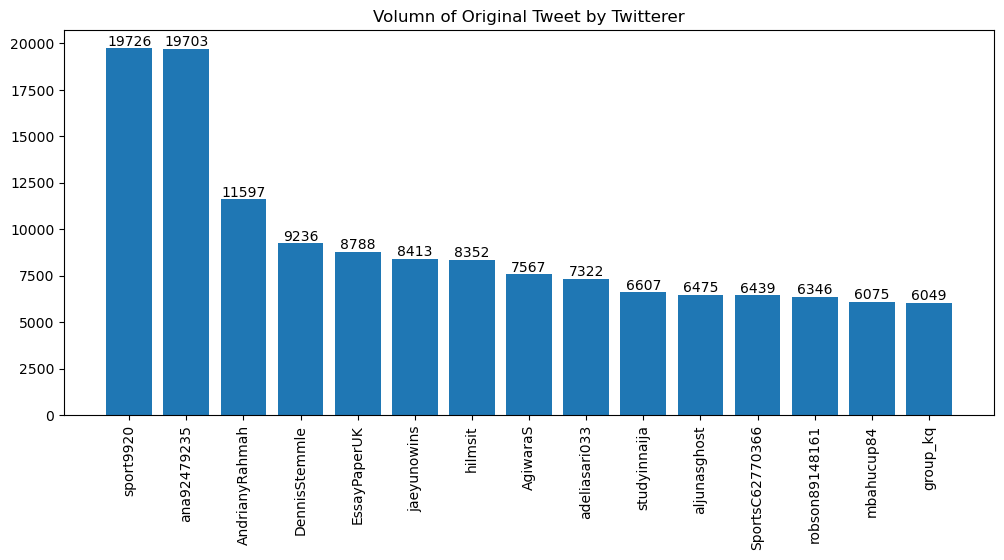

In [70]:
fig, ax = plt.subplots(figsize=(12, 5))
bars = ax.bar(volumn_og['user_screen_name'], volumn_og['count(id)'])
ax.bar_label(bars)
ax.set_title('Volumn of Original Tweet by Twitterer')
plt.xticks(rotation=90)

<AxesSubplot:title={'center':'Volumn of Retweeted Tweets by Twitterers'}, xlabel='retweeted_status_user_screen_name'>

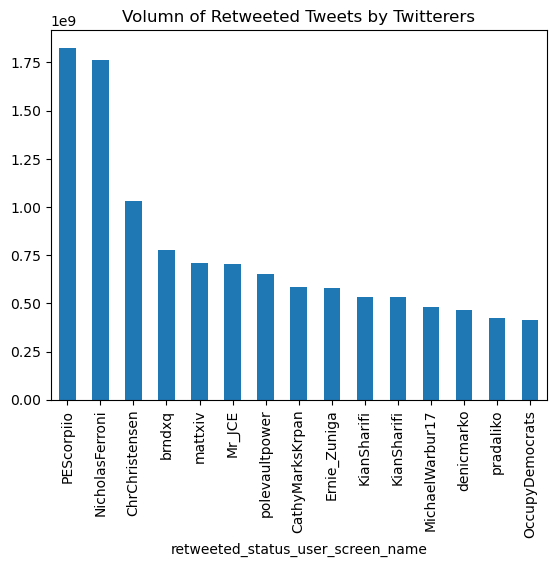

In [43]:
volumn_re.plot(kind='bar',x='retweeted_status_user_screen_name', y='sum(retweeted_status_retweet_count)', legend=None, title="Volumn of Retweeted Tweets by Twitterers")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

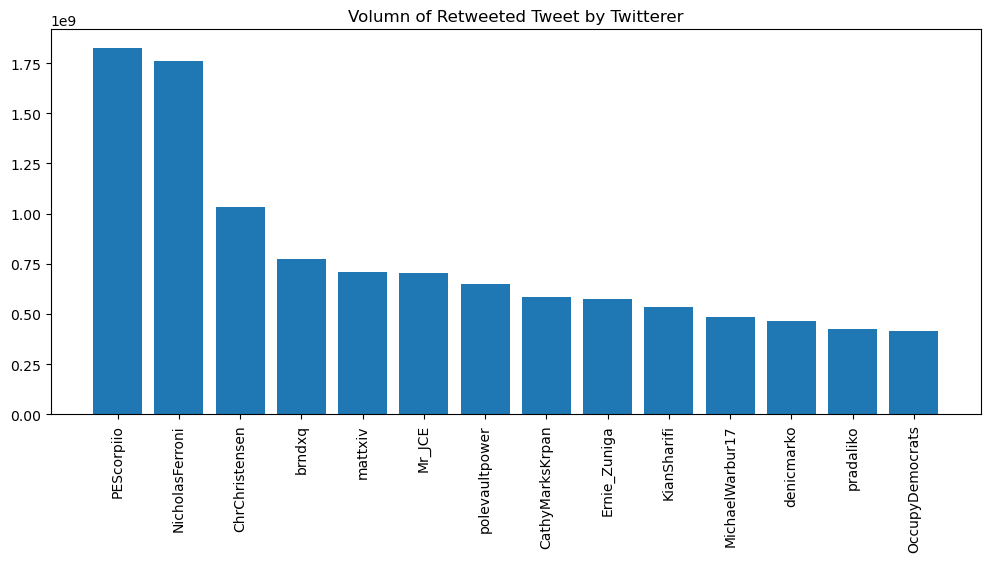

In [71]:
fig, ax = plt.subplots(figsize=(12, 5))
bars = ax.bar(volumn_re['retweeted_status_user_screen_name'], volumn_re['sum(retweeted_status_retweet_count)'])
# ax.bar_label(bars)
ax.set_title('Volumn of Retweeted Tweet by Twitterer')
plt.xticks(rotation=90)

<AxesSubplot:title={'center':'Volumn of Original Tweet by Twitter Type'}, xlabel='user_type'>

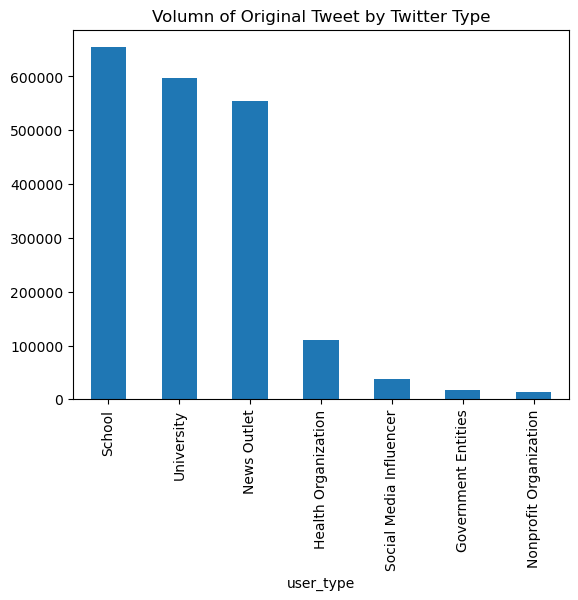

In [31]:
volumn_og_by_type[(volumn_og_by_type.user_type != 'Other') & (volumn_og_by_type.tweet_type == 'original') ].plot(kind='bar',x='user_type', y='count(id)', legend=None, title="Volumn of Original Tweet by Twitter Type")

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

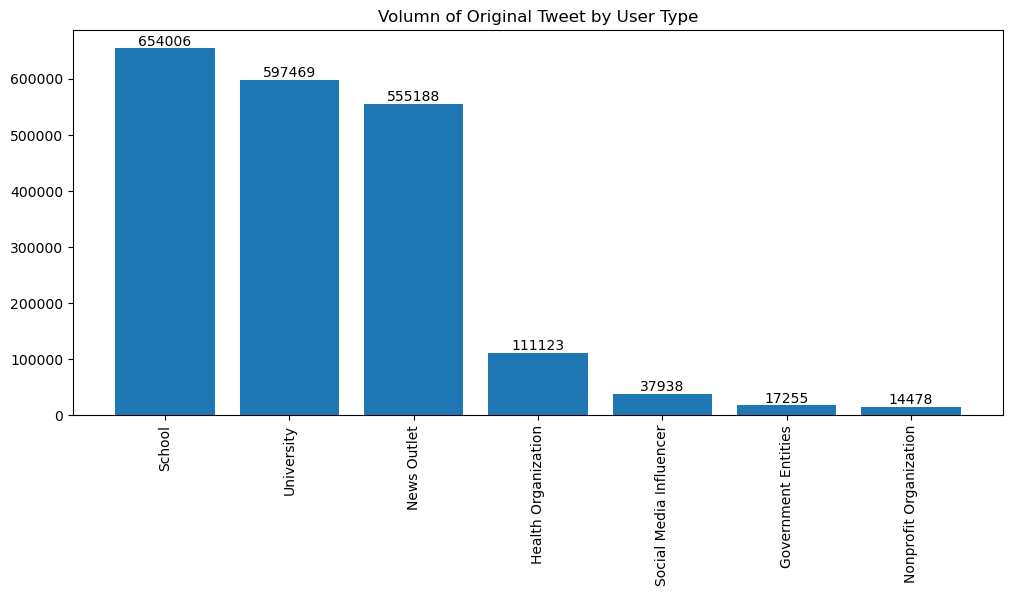

In [82]:
fig, ax = plt.subplots(figsize=(12, 5))
bars = ax.bar(volumn_og_by_type[(volumn_og_by_type.user_type != 'Other') & (volumn_og_by_type.tweet_type == 'original')]['user_type'], volumn_og_by_type[(volumn_og_by_type.user_type != 'Other') & (volumn_og_by_type.tweet_type == 'original')]['count(id)'])
ax.bar_label(bars)
ax.set_title('Volumn of Original Tweet by User Type')
plt.xticks(rotation=90)

<AxesSubplot:title={'center':'Volumn of Retweeted Tweets by Twitter Type'}, xlabel='retweeted_status_user_type'>

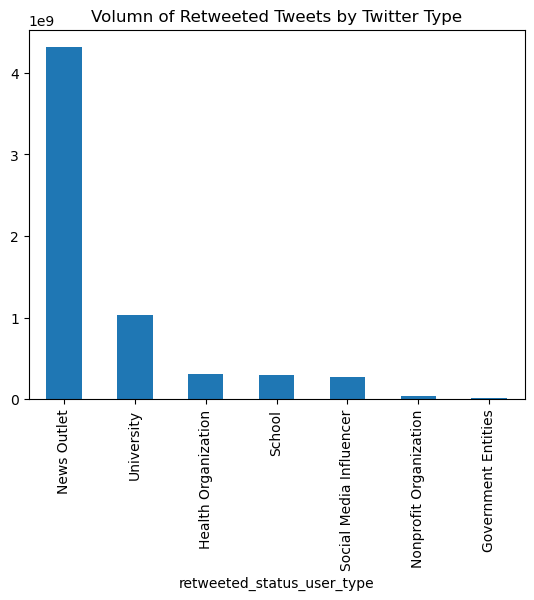

In [42]:
volumn_re_by_type[(volumn_re_by_type.retweeted_status_user_type != 'Other') & (~volumn_re_by_type.retweeted_status_user_type.isnull())].plot(kind='bar',x='retweeted_status_user_type', y='sum(retweeted_status_retweet_count)', legend=None, title="Volumn of Retweeted Tweets by Twitter Type")

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

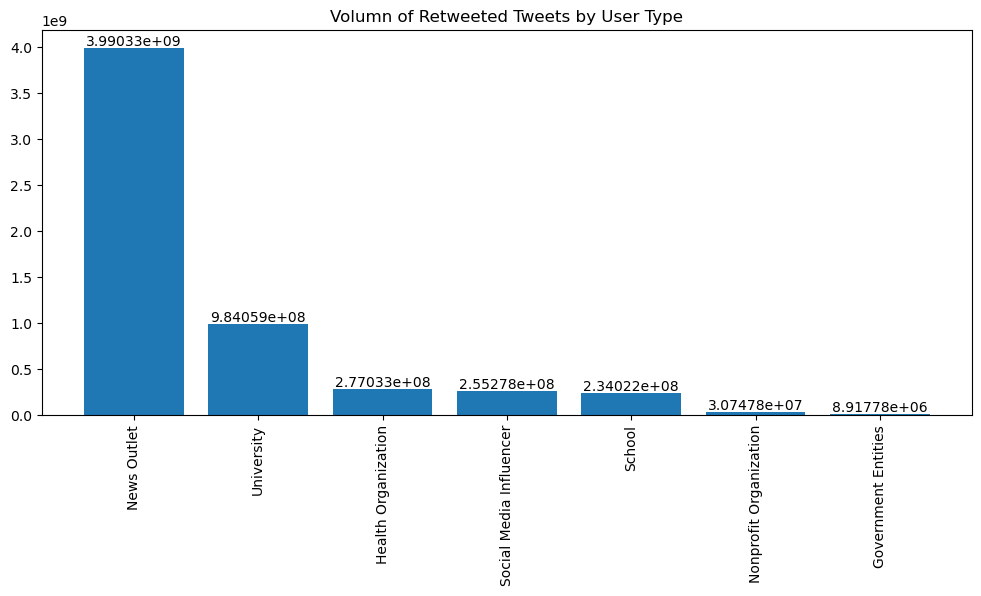

22/12/07 23:29:25 WARN org.apache.spark.deploy.yarn.YarnAllocator: Container from a bad node: container_1670444917242_0006_01_000014 on host: hub-msca-bdp-dphub-students-backup-linhcle-sw-5tt7.c.msca-bdp-students.internal. Exit status: 143. Diagnostics: [2022-12-07 23:29:25.040]Container killed on request. Exit code is 143
[2022-12-07 23:29:25.041]Container exited with a non-zero exit code 143. 
[2022-12-07 23:29:25.042]Killed by external signal
.
22/12/07 23:29:25 WARN org.apache.spark.scheduler.cluster.YarnSchedulerBackend$YarnSchedulerEndpoint: Requesting driver to remove executor 13 for reason Container from a bad node: container_1670444917242_0006_01_000014 on host: hub-msca-bdp-dphub-students-backup-linhcle-sw-5tt7.c.msca-bdp-students.internal. Exit status: 143. Diagnostics: [2022-12-07 23:29:25.040]Container killed on request. Exit code is 143
[2022-12-07 23:29:25.041]Container exited with a non-zero exit code 143. 
[2022-12-07 23:29:25.042]Killed by external signal
.
22/12/07 2

In [18]:
fig, ax = plt.subplots(figsize=(12, 5))
bars = ax.bar(volumn_re_by_type[(volumn_re_by_type.retweeted_status_user_type != 'Other') & (~volumn_re_by_type.retweeted_status_user_type.isnull())]['retweeted_status_user_type'], volumn_re_by_type[(volumn_re_by_type.retweeted_status_user_type != 'Other') & (~volumn_re_by_type.retweeted_status_user_type.isnull())]['sum(retweeted_status_retweet_count)'])
ax.bar_label(bars)
ax.set_title('Volumn of Retweeted Tweets by User Type')
plt.xticks(rotation=90)

In [90]:
tweets_df_complete[tweets_df_complete.user_screen_name == 'PEScorpiio'].limit(20)

created_at,id,text,favorite_count,retweet_count,reply_count,retweeted_status_retweet_count,retweeted_status_user_screen_name,tweet_longitude,tweet_latitude,user_created_at,user_id,user_description,user_favourites_count,user_followers_count,user_friends_count,user_location,user_screen_name,user_verified,place_country,place_name,place_full_name,user_type,tweet_type,retweeted_status_user_type
Sun Jul 24 20:22:...,1551301879623196672,Incoming medical ...,0,0,0,null,null,null,null,Mon Jan 24 00:11:...,242113465,Love irrationally...,71303,1608,966,"Detroit, MI",PEScorpiio,false,null,null,null,Other,original,null


In [88]:
tweets_df_clean[tweets_df_clean.retweeted_status_user_screen_name == 'PEScorpiio']

created_at,id,text,favorite_count,retweet_count,reply_count,retweeted_status_retweet_count,retweeted_status_user_screen_name,tweet_longitude,tweet_latitude,user_created_at,user_id,user_description,user_favourites_count,user_followers_count,user_friends_count,user_location,user_screen_name,user_verified,place_country,place_name,place_full_name,user_type,tweet_type
Wed Jul 27 11:57:...,1552261852574486528,RT @PEScorpiio: I...,0,0,0,103441,PEScorpiio,null,null,Thu Jun 07 02:21:...,601480789,I'M JUST ME.... N...,61537,3182,5002,null,MelonySutton,false,null,null,null,Other,retweet
Wed Jul 27 12:01:...,1552262826483486720,RT @PEScorpiio: I...,0,0,0,103444,PEScorpiio,null,null,Fri Jun 05 02:10:...,1268726645889871874,Always Film The P...,85,553,79,"Grand Rapids, MI",AFTPGR,false,null,null,null,Other,retweet
Sat Jul 30 06:24:...,1553265278385065985,RT @PEScorpiio: I...,0,0,0,104422,PEScorpiio,null,null,Mon Apr 11 15:21:...,1513537625889644550,What I am is what...,2348,21,198,null,ktg661,false,null,null,null,Other,retweet
Sat Jul 30 06:25:...,1553265545780555776,RT @PEScorpiio: I...,0,0,0,104423,PEScorpiio,null,null,Fri Jan 01 09:52:...,4688515520,𝗼𝗻𝗰𝗲 𝗺𝗮𝗻𝘆...,2304,1105,440,Solo - Seoul - Os...,deisperate,false,null,null,null,Other,retweet
Tue Jul 26 19:36:...,1552014942663938048,RT @PEScorpiio: I...,0,0,0,101799,PEScorpiio,null,null,Thu Apr 07 14:08:...,718078010159665152,"not a heathen, ju...",751,58,411,Hell,WoahThunderdome,false,null,null,null,Other,retweet
Tue Jul 26 19:36:...,1552015009118441475,RT @PEScorpiio: I...,0,0,0,101802,PEScorpiio,null,null,Fri Apr 28 23:00:...,858093701569986560,moose/suze/like 5...,33906,64,788,Sitting on a deep...,seaventcrawler,false,null,null,null,Other,retweet
Tue Jul 26 19:36:...,1552015012071321605,RT @PEScorpiio: I...,0,0,0,101803,PEScorpiio,null,null,Sat Dec 01 17:41:...,982995216,Lifetime democrat...,117634,8644,8592,Somewhere,trekipopooli,false,null,null,null,Other,retweet
Tue Jul 26 19:37:...,1552015272109899781,RT @PEScorpiio: I...,0,0,0,101812,PEScorpiio,null,null,Fri Sep 30 17:41:...,382784305,i protect the thi...,27102,1667,1385,beacon hills,xtacosaurusx,false,null,null,null,Other,retweet
Tue Jul 26 19:38:...,1552015457023959040,RT @PEScorpiio: I...,0,0,0,101821,PEScorpiio,null,null,Fri Apr 28 19:33:...,858041552341434370,21 • she/they • ?...,6859,91,180,null,itd_frosting,false,null,null,null,Other,retweet
Tue Jul 26 19:38:...,1552015470508867591,RT @PEScorpiio: I...,0,0,0,101820,PEScorpiio,null,null,Wed Feb 04 12:13:...,3017337107,⋆. eu & 𝗷𝘂𝗻𝗺?...,19831,2873,1140,e.i.b.m.l ♡ hello...,calumyeon,false,null,null,null,Other,retweet


### II. Location Analysis

In [93]:
!pip install plotly
!pip install cufflinks

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 72.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.7/81.7 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.7/247.7 kB 14.9 MB/s eta 0:00:00
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=67918 sha256=4c34fc8ad2bc5b91c1b00e28bf4a6a484d1e3b1bd947c74913a5df2acf177d8b
  Stored in directory: /root/.cache/pip/wheels/8b/0c/8c/6b052b6e9281a66c0618959319eb404b1ae6dba84c5505a4c6
Successfully built cufflinks
  Attempting uninstall: python-dateutil
    Found existing installation: python-dateutil 2.8.0
    Uninstalling python-dateutil-2.8.0:
      Successfully uninstalled python-dateutil-2.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pysal 2.4.0 requires python-dateutil<=2.8.0, but yo

In [21]:
tweets_location = tweets_df_complete[~tweets_df_complete.tweet_longitude.isNull()]

In [22]:
print((tweets_location.count()),len(tweets_location.columns))

54694 25


22/12/08 00:09:06 ERROR org.apache.spark.scheduler.cluster.YarnScheduler: Lost executor 22 on hub-msca-bdp-dphub-students-backup-linhcle-sw-td6b.c.msca-bdp-students.internal: Container marked as failed: container_1670444917242_0006_01_000023 on host: hub-msca-bdp-dphub-students-backup-linhcle-sw-td6b.c.msca-bdp-students.internal. Exit status: -100. Diagnostics: Container released on a *lost* node.
22/12/08 00:09:06 WARN org.apache.spark.scheduler.cluster.YarnSchedulerBackend$YarnSchedulerEndpoint: Requesting driver to remove executor 22 for reason Container marked as failed: container_1670444917242_0006_01_000023 on host: hub-msca-bdp-dphub-students-backup-linhcle-sw-td6b.c.msca-bdp-students.internal. Exit status: -100. Diagnostics: Container released on a *lost* node.
22/12/08 00:09:06 WARN org.apache.spark.scheduler.cluster.YarnSchedulerBackend$YarnSchedulerEndpoint: Requesting driver to remove executor 23 for reason Container marked as failed: container_1670444917242_0006_01_000024 

In [25]:
tweets_location_pd = tweets_location[['user_screen_name','id','created_at','retweeted_status_retweet_count','retweeted_status_user_screen_name','tweet_longitude','tweet_latitude']].toPandas()

22/12/08 00:13:13 WARN org.apache.spark.scheduler.cluster.YarnSchedulerBackend$YarnSchedulerEndpoint: Requesting driver to remove executor 34 for reason Container marked as failed: container_1670444917242_0006_01_000035 on host: hub-msca-bdp-dphub-students-backup-linhcle-sw-69wq.c.msca-bdp-students.internal. Exit status: -100. Diagnostics: Container released on a *lost* node.
22/12/08 00:13:13 WARN org.apache.spark.scheduler.cluster.YarnSchedulerBackend$YarnSchedulerEndpoint: Requesting driver to remove executor 33 for reason Container marked as failed: container_1670444917242_0006_01_000034 on host: hub-msca-bdp-dphub-students-backup-linhcle-sw-69wq.c.msca-bdp-students.internal. Exit status: -100. Diagnostics: Container released on a *lost* node.
22/12/08 00:13:13 ERROR org.apache.spark.scheduler.cluster.YarnScheduler: Lost executor 34 on hub-msca-bdp-dphub-students-backup-linhcle-sw-69wq.c.msca-bdp-students.internal: Container marked as failed: container_1670444917242_0006_01_000035 

In [26]:
tweets_location_pd.head()

,user_screen_name,id,created_at,retweeted_status_retweet_count,retweeted_status_user_screen_name,tweet_longitude,tweet_latitude
0,18tonster,1563760044537253893,Sun Aug 28 05:27:02 +0000 2022,NaN,None,-118.490007,34.006001
1,1HammadSamana,1550327754989740032,Fri Jul 22 03:51:55 +0000 2022,NaN,None,100.837160,13.612205
2,1HammadSamana,1550339695724449794,Fri Jul 22 04:39:22 +0000 2022,NaN,None,100.837160,13.612205
3,1SG09,1569703213015654400,Tue Sep 13 15:03:04 +0000 2022,NaN,None,-77.303772,38.681332
4,1TheLetterLBea1,1566107751629180931,Sat Sep 03 16:55:59 +0000 2022,NaN,None,-88.219974,40.107959


<AxesSubplot:>

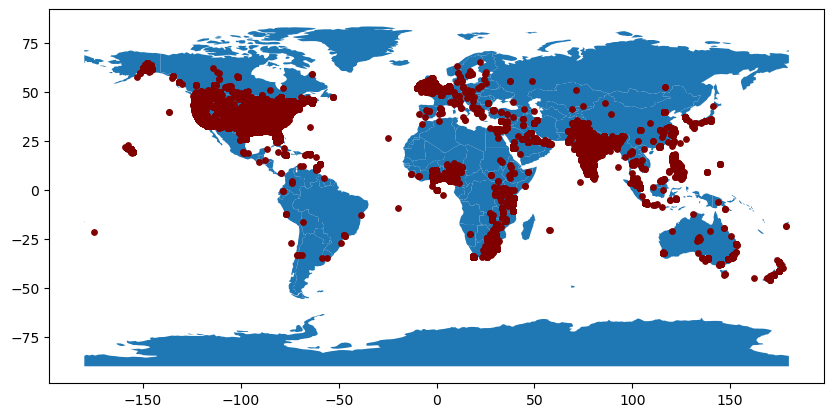

In [33]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame


geometry = [Point(xy) for xy in zip(tweets_location_pd['tweet_longitude'], tweets_location_pd['tweet_latitude'])]
gdf = GeoDataFrame(tweets_location_pd, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='maroon', markersize=15,)

#### Topics in education: "math book ban", "school shooting", "standardized tests", "student loan", "teacher tenure"

### III. Timeline Analysis 

In [34]:
tweets_df_timeline = tweets_df_complete.withColumn('dow', substring('created_at', 1,3))\
    .withColumn('date', substring('created_at', 9,2))\
    .withColumn('month', substring('created_at', 5,3))\
    .withColumn('month2', substring('created_at', 5,3))\
    .withColumn('year', substring('created_at', 27,4))\
    .withColumn('hour', substring('created_at', 12,2))

In [36]:
monthDict = {"Jan":'01',"Feb":'02',"Mar":'03',"Apr":'04',"May":'05',"Jun":'06',"Jul":'07',"Aug":'08',"Sep":'09',"Oct":'10',"Nov":'11',"Dec":'12'}
tweets_df_timeline = tweets_df_timeline.replace(monthDict,subset=['month2'])
tweets_df_timeline = tweets_df_timeline.withColumn('month_date', concat_ws('-',tweets_df_timeline.month2,tweets_df_timeline.date))

In [37]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure